In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df = pd.read_csv("/Users/mdnaif/Desktop/Winter_Arc_ML/day1_logistic_regression/Social_Network_Ads.csv")
print(df.head(5))
print()
print(df.tail(5))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

      User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1


In [175]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [176]:
print(f"Shape : {df.shape}")
print(f"Size : {df.size}")

Shape : (400, 5)
Size : 2000


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [178]:
df = df.drop(columns=["User ID"])

In [179]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [180]:
df.nunique()

Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

### EDA

In [181]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

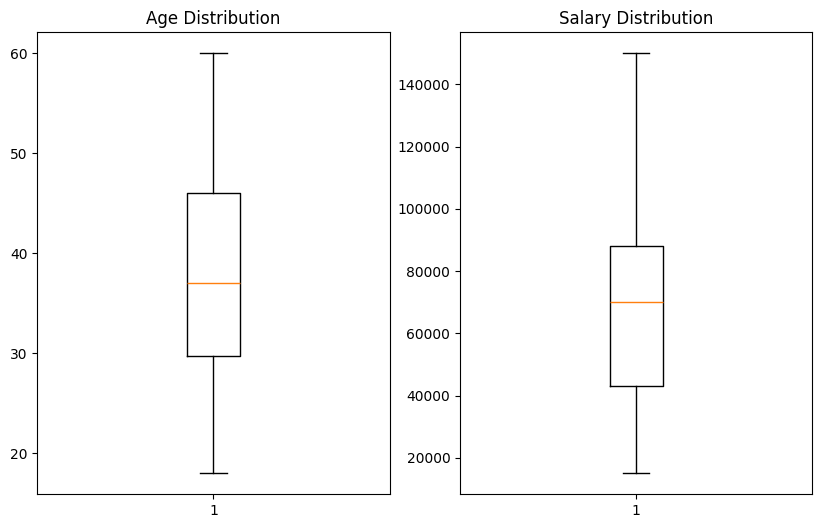

In [182]:
fig , ax = plt.subplots(1,2,figsize = (10,6))
ax[0].boxplot(df["Age"])
ax[0].set_title("Age Distribution")
ax[1].boxplot(df["EstimatedSalary"])
ax[1].set_title("Salary Distribution")
plt.tight_layout

### Preprocessing

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [184]:
X = df[["Gender", "Age" , "EstimatedSalary"]]
y = df["Purchased"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42)

In [185]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), ["Age","EstimatedSalary"]),
    ("cat", OneHotEncoder(drop = "first"), ["Gender"])
])

### Training the model

In [186]:
from sklearn.linear_model import LogisticRegression

model = make_pipeline(preprocessor,LogisticRegression())
model.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [187]:
y_pred = model.predict(X_test)

In [188]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.88

Confusion Matrix:
 [[61  2]
 [10 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        63
           1       0.93      0.73      0.82        37

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.86       100
weighted avg       0.89      0.88      0.88       100

